# Task 1: Create a Bell State Circuit
Build a quantum circuit that generates the Bell state



Use 2 qubits

Use qml.probs() to display the probability distribution

Bonus: visualize the statevector or show measurement samples

In [2]:
import pennylane as qml
from pennylane import numpy as np
import sympy
import matplotlib.pyplot as plt
from pennylane.drawer import draw_mpl

Statevector (SymPy representation):
⎡√2⎤
⎢──⎥
⎢2 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢0 ⎥
⎢  ⎥
⎢√2⎥
⎢──⎥
⎣2 ⎦


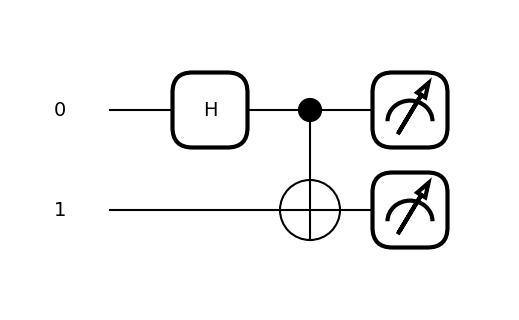

In [3]:
dev_analytic = qml.device("default.qubit", wires=2, shots=None)

@qml.qnode(dev_analytic)
def bell_state_analytic():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.state(), qml.probs(wires=[0, 1])

state, probs = bell_state_analytic()

# Convert statevector to SymPy matrix
state_matrix = sympy.Matrix(state)
state_matrix = state_matrix.applyfunc(lambda x: sympy.nsimplify(x, tolerance=1e-10))

draw_mpl(bell_state_analytic)() # Draw the Bell Circuit
print("Statevector (SymPy representation):")
sympy.pprint(state_matrix)


Probability distribution:
|00⟩: 0.5000
|01⟩: 0.0000
|10⟩: 0.0000
|11⟩: 0.5000


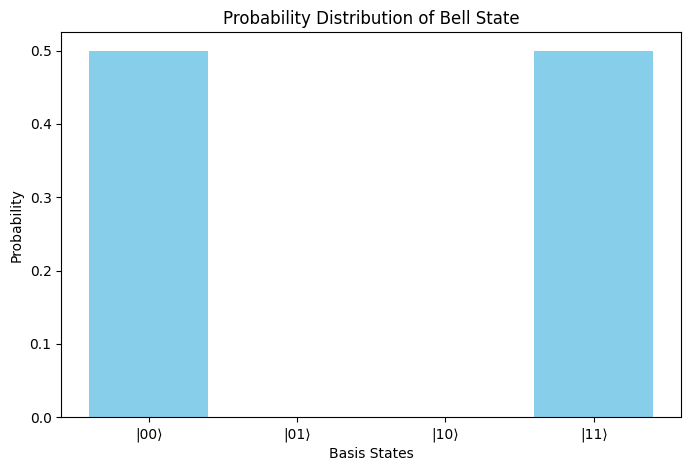

In [4]:
# Print the probability distribution
print("\nProbability distribution:")
basis_states = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
for state_label, prob in zip(basis_states, probs):
    print(f"{state_label}: {prob:.4f}")

# Visualize the probability distribution
plt.figure(figsize=(8, 5))
plt.bar(basis_states, probs, color='skyblue')
plt.title('Probability Distribution of Bell State')
plt.xlabel('Basis States')
plt.ylabel('Probability')
plt.show()

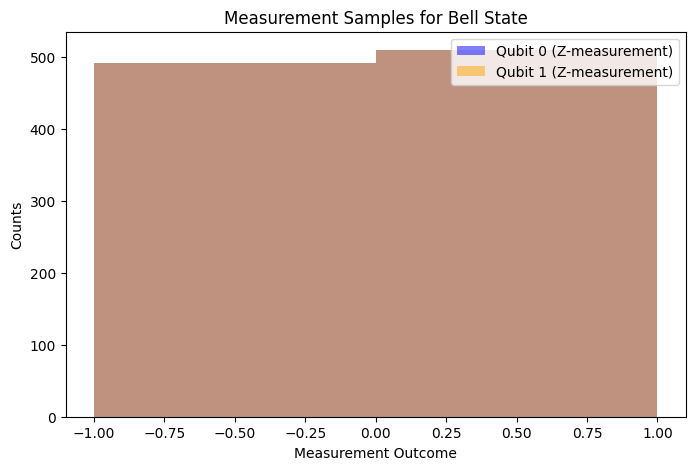

In [5]:
dev_sampling = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev_sampling)
def bell_state_samples():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

samples_q0, samples_q1 = bell_state_samples()

# Visualize measurement samples
plt.figure(figsize=(8, 5))
plt.hist(samples_q0, bins=2, alpha=0.5, label='Qubit 0 (Z-measurement)', color='blue')
plt.hist(samples_q1, bins=2, alpha=0.5, label='Qubit 1 (Z-measurement)', color='orange')
plt.title('Measurement Samples for Bell State')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [6]:
density_matrix = np.outer(state, np.conj(state))
density_matrix_sympy = sympy.Matrix(density_matrix)
density_matrix_sympy = density_matrix_sympy.applyfunc(lambda x: sympy.nsimplify(x, tolerance=1e-10))

print("\nDensity matrix of the Bell state:")
sympy.pprint(density_matrix_sympy)


Density matrix of the Bell state:
⎡1/2  0  0  1/2⎤
⎢              ⎥
⎢ 0   0  0   0 ⎥
⎢              ⎥
⎢ 0   0  0   0 ⎥
⎢              ⎥
⎣1/2  0  0  1/2⎦


# Task 2: Build a GHZ State for 3 Qubits
Construct a circuit that prepares a 3-qubit GHZ state:

Use Hadamard and CNOT gates

Measure using qml.probs(wires=[0, 1, 2])

Optional: extend to 4 qubits

3-Qubit GHZ State Probability Distribution:
|000⟩: 0.5000
|001⟩: 0.0000
|010⟩: 0.0000
|011⟩: 0.0000
|100⟩: 0.0000
|101⟩: 0.0000
|110⟩: 0.0000
|111⟩: 0.5000


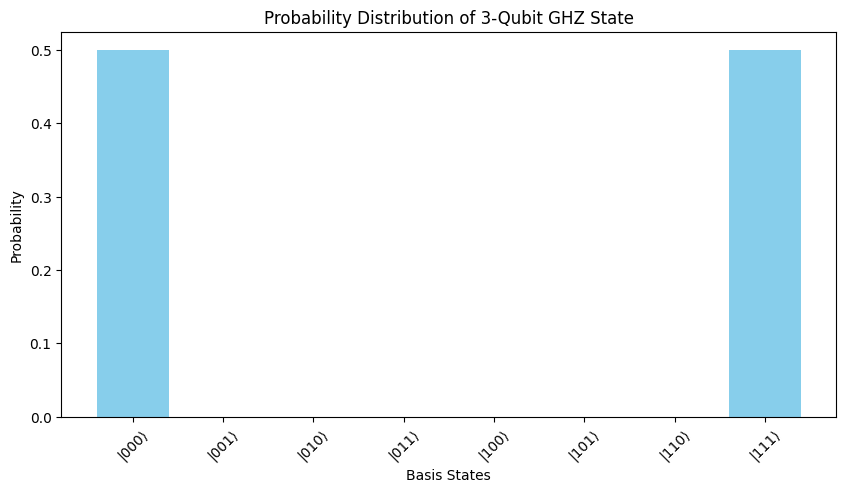


3-Qubit GHZ Circuit Diagram:


(<Figure size 600x400 with 1 Axes>, <Axes: >)

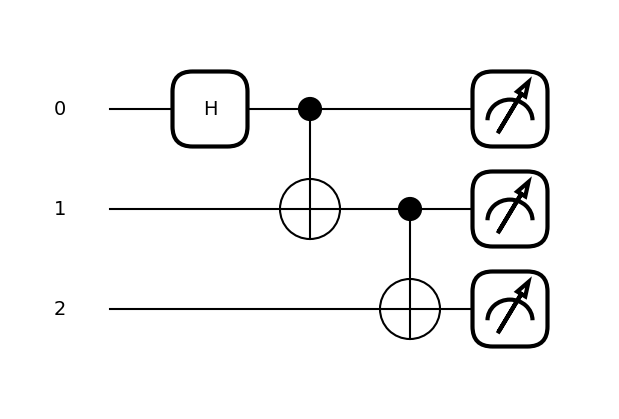

In [7]:
# 3-Qubit GHZ State
dev_3qubits = qml.device("default.qubit", wires=3, shots=None)

@qml.qnode(dev_3qubits)
def ghz_3qubit_circuit():
    # Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)
    # Apply CNOT gates to entangle qubits
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    return qml.probs(wires=[0, 1, 2])

# Execute the 3-qubit circuit
probs_3qubits = ghz_3qubit_circuit()

# Print the probability distribution
print("3-Qubit GHZ State Probability Distribution:")
basis_states_3 = ['|000⟩', '|001⟩', '|010⟩', '|011⟩', '|100⟩', '|101⟩', '|110⟩', '|111⟩']
for state, prob in zip(basis_states_3, probs_3qubits):
    print(f"{state}: {prob:.4f}")

# Visualize the probability distribution
plt.figure(figsize=(10, 5))
plt.bar(basis_states_3, probs_3qubits, color='skyblue')
plt.title('Probability Distribution of 3-Qubit GHZ State')
plt.xlabel('Basis States')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

# Draw the 3-qubit circuit
print("\n3-Qubit GHZ Circuit Diagram:")
draw_mpl(ghz_3qubit_circuit)()


4-Qubit GHZ State Probability Distribution:
|0000⟩: 0.5000
|0001⟩: 0.0000
|0010⟩: 0.0000
|0011⟩: 0.0000
|0100⟩: 0.0000
|0101⟩: 0.0000
|0110⟩: 0.0000
|0111⟩: 0.0000
|1000⟩: 0.0000
|1001⟩: 0.0000
|1010⟩: 0.0000
|1011⟩: 0.0000
|1100⟩: 0.0000
|1101⟩: 0.0000
|1110⟩: 0.0000
|1111⟩: 0.5000


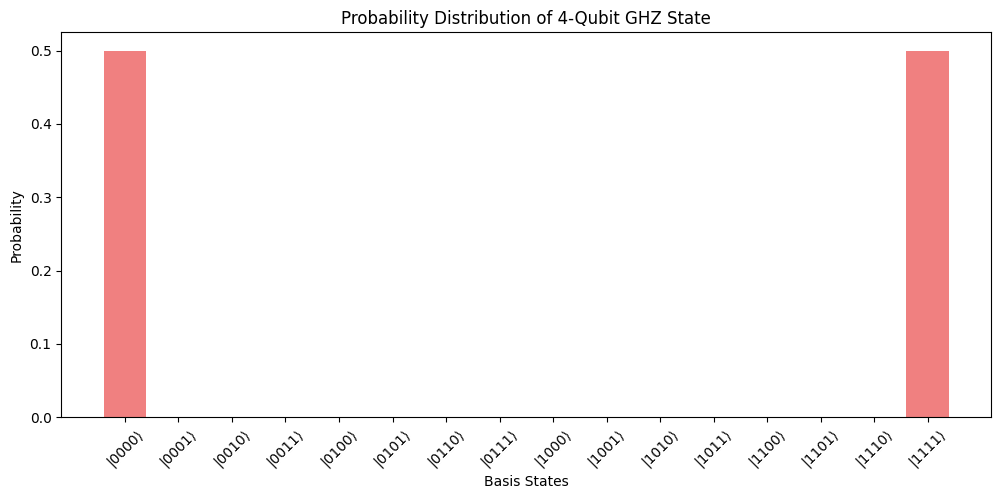


4-Qubit GHZ Circuit Diagram:


(<Figure size 700x500 with 1 Axes>, <Axes: >)

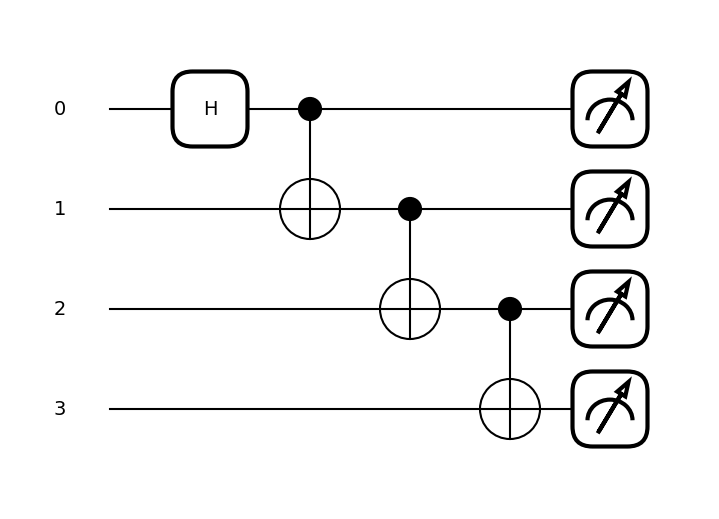

In [8]:
# 4-Qubit GHZ State
dev_4qubits = qml.device("default.qubit", wires=4, shots=None)

@qml.qnode(dev_4qubits)
def ghz_4qubit_circuit():
    # Apply Hadamard gate to the first qubit
    qml.Hadamard(wires=0)
    # Apply CNOT gates to entangle qubits
    qml.CNOT(wires=[0, 1])
    qml.CNOT(wires=[1, 2])
    qml.CNOT(wires=[2, 3])
    return qml.probs(wires=[0, 1, 2, 3])

# Execute the 4-qubit circuit
probs_4qubits = ghz_4qubit_circuit()

# Print the probability distribution
print("\n4-Qubit GHZ State Probability Distribution:")
basis_states_4 = ['|0000⟩', '|0001⟩', '|0010⟩', '|0011⟩', '|0100⟩', '|0101⟩', '|0110⟩', '|0111⟩',
                  '|1000⟩', '|1001⟩', '|1010⟩', '|1011⟩', '|1100⟩', '|1101⟩', '|1110⟩', '|1111⟩']
for state, prob in zip(basis_states_4, probs_4qubits):
    print(f"{state}: {prob:.4f}")

# Visualize the probability distribution
plt.figure(figsize=(12, 5))
plt.bar(basis_states_4, probs_4qubits, color='lightcoral')
plt.title('Probability Distribution of 4-Qubit GHZ State')
plt.xlabel('Basis States')
plt.ylabel('Probability')
plt.xticks(rotation=45)
plt.show()

# Draw the 4-qubit circuit
print("\n4-Qubit GHZ Circuit Diagram:")
draw_mpl(ghz_4qubit_circuit)()

# Task 3: Rotation + Measurement Circuit
Design a single-qubit rotation circuit using RX, RY, or RZ gates.

Make the rotation angle a variable input

Return the expectation value of PauliZ

Plot how the output changes as you vary the input angle



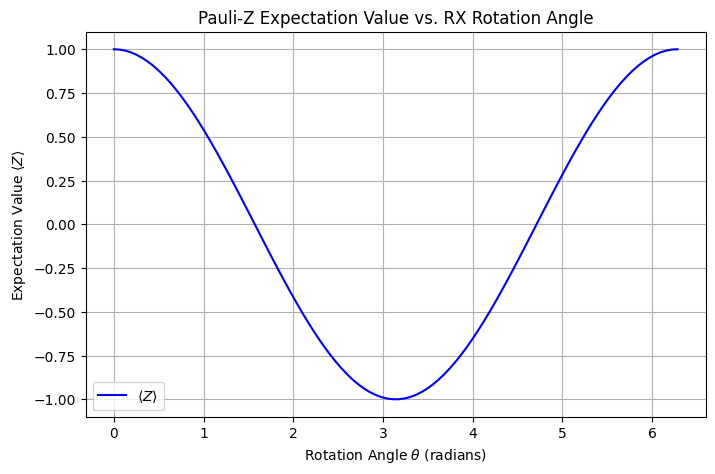


Single-Qubit Rotation Circuit:


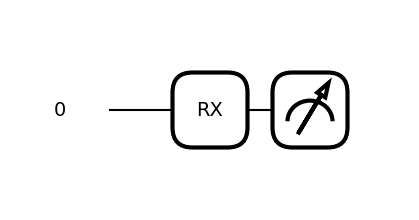

In [9]:
# Initialize a single-qubit device
dev = qml.device("default.qubit", wires=1, shots=None)

# Define the rotation circuit with variable angle
@qml.qnode(dev)
def rotation_circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0)) 

# Compute expectation values for a range of angles
theta_values = np.linspace(0, 2 * np.pi, 100)
expval_z = [rotation_circuit(theta) for theta in theta_values]

# Plot the expectation value vs. rotation angle
plt.figure(figsize=(8, 5))
plt.plot(theta_values, expval_z, label=r'$\langle Z \rangle$', color='blue')
plt.xlabel(r'Rotation Angle $\theta$ (radians)')
plt.ylabel(r'Expectation Value $\langle Z \rangle$')
plt.title('Pauli-Z Expectation Value vs. RX Rotation Angle')
plt.grid(True)
plt.legend()
plt.show()

print("\nSingle-Qubit Rotation Circuit:")
fig, ax = qml.draw_mpl(rotation_circuit)(np.pi)  # Example with theta = pi
plt.show()

## Task 4: Simple Variational Optimization
Create a cost function that depends on a gate parameter, and optimize it using PennyLane’s gradient descent optimizer.

Use a rotation gate like RX, and minimize expval(PauliZ)

Log or print cost at each step

Output the optimal parameter found

plot the cost function curve

Step | Cost (Pauli-Z Expectation)
------------------------------
   0 | 0.995004
   1 | 0.993958
   2 | 0.992693
   3 | 0.991165
   4 | 0.989319
   5 | 0.987089
   6 | 0.984397
   7 | 0.981148
   8 | 0.977231
   9 | 0.972509
  10 | 0.966823
  11 | 0.959983
  12 | 0.951764
  13 | 0.941903
  14 | 0.930092
  15 | 0.915975
  16 | 0.899143
  17 | 0.879134
  18 | 0.855433
  19 | 0.827474
  20 | 0.794658
  21 | 0.756365
  22 | 0.711986
  23 | 0.660965
  24 | 0.602845
  25 | 0.537337
  26 | 0.464384
  27 | 0.384232
  28 | 0.297480
  29 | 0.205113
  30 | 0.108492
  31 | 0.009296
  32 | -0.090575
  33 | -0.189142
  34 | -0.284499
  35 | -0.374958
  36 | -0.459165
  37 | -0.536168
  38 | -0.605427
  39 | -0.666789
  40 | -0.720426
  41 | -0.766754
  42 | -0.806355
  43 | -0.839904
  44 | -0.868109
  45 | -0.891668
  46 | -0.911241
  47 | -0.927427
  48 | -0.940763
  49 | -0.951717
  50 | -0.960690
  51 | -0.968027
  52 | -0.974014
  53 | -0.978893
  54 | -0.982865
  55 | -0.986096
  56 | -0.98872

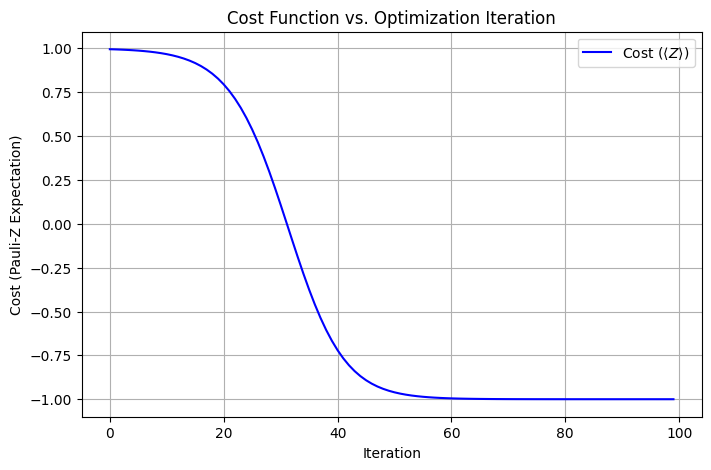


Variational Circuit with Optimal Parameter:


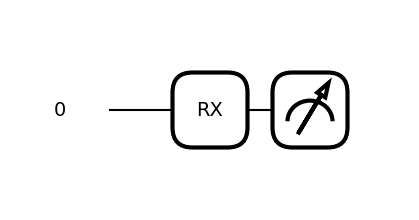

In [20]:
# Initialize a single-qubit device
dev = qml.device("default.qubit", wires=1, shots=None)

# Define the variational circuit
@qml.qnode(dev)
def variational_circuit(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))

# Define the cost function
def cost(theta):
    return variational_circuit(theta)

# Initialize the parameter with a small offset to avoid zero gradient
theta = np.array(0.1, requires_grad=True)

# Adam for better convergence)
# opt = qml.AdamOptimizer(stepsize=0.1)
opt = qml.GradientDescentOptimizer(stepsize=0.1)

# Optimization parameters
max_iterations = 100
cost_history = []

# Optimize the parameter
print("Step | Cost (Pauli-Z Expectation)")
print("-" * 30)
for i in range(max_iterations):
    theta, cost_val = opt.step_and_cost(cost, theta)
    cost_history.append(cost_val)
    print(f"{i:4d} | {cost_val:.6f}")

# Output the optimal parameter
optimal_theta = theta
print(f"\nOptimal parameter (theta): {optimal_theta:.6f} radians")

# Plot the cost function over iterations
plt.figure(figsize=(8, 5))
plt.plot(range(max_iterations), cost_history, label='Cost ($\\langle Z \\rangle$)', color='blue')
plt.xlabel('Iteration')
plt.ylabel('Cost (Pauli-Z Expectation)')
plt.title('Cost Function vs. Optimization Iteration')
plt.grid(True)
plt.legend()
plt.show()

# Draw the circuit with the optimal parameter
print("\nVariational Circuit with Optimal Parameter:")
fig, ax = qml.draw_mpl(variational_circuit)(optimal_theta)
plt.show()

# Task 5: Measurement Comparison
Build a 1- or 2-qubit circuit and compare results from:

qml.probs()

qml.sample()

qml.expval()

Explain how they differ in output and when you'd use each.

Discuss why probs() is deterministic but sample() is random.

Probability Distribution (qml.probs):
|00⟩: 0.5000
|01⟩: 0.0000
|10⟩: 0.0000
|11⟩: 0.5000

Expectation Values (q0ml.expval):
Pauli-Z Qubit 0: 0.0000
Pauli-Z Qubit 1: 0.0000

Sampled Outcomes (qml.sample, first 10 shots):
Qubit 0 (Pauli-Z): [ 1.  1.  1.  1. -1. -1. -1.  1.  1. -1.]
Qubit 1 (Pauli-Z): [ 1.  1.  1.  1. -1. -1. -1.  1.  1. -1.]


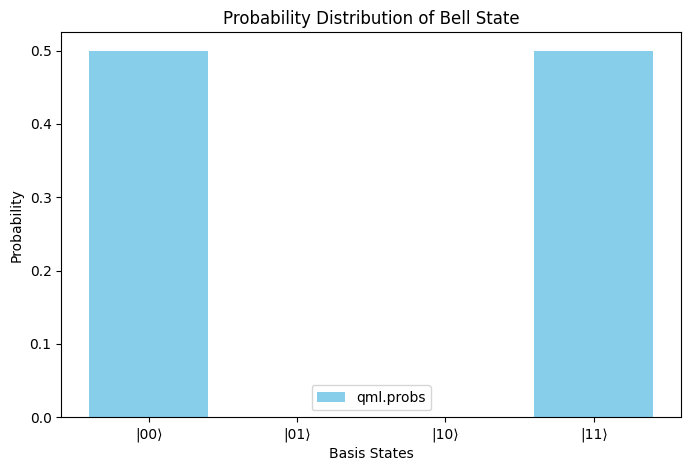

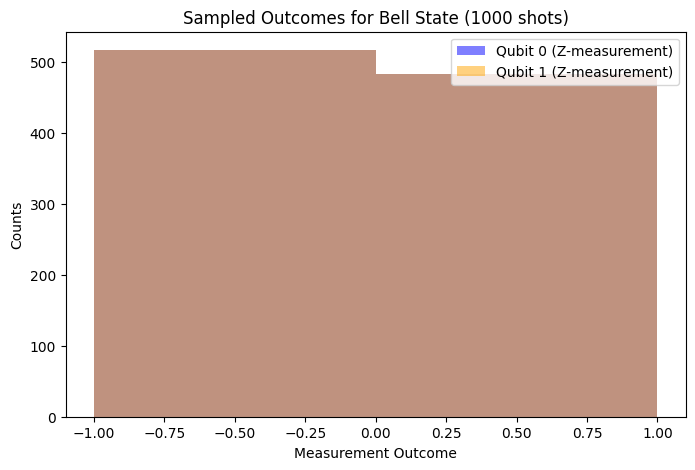


Bell State Circuit:


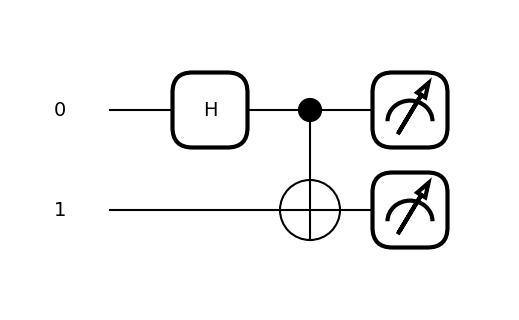

In [12]:
# Analytic Device for probs() and expval()
dev_analytic = qml.device("default.qubit", wires=2, shots=None)

@qml.qnode(dev_analytic)
def bell_state_analytic():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0, 1]), qml.expval(qml.PauliZ(0)), qml.expval(qml.PauliZ(1))

# Sampling Device for sample()
dev_sampling = qml.device("default.qubit", wires=2, shots=1000)

@qml.qnode(dev_sampling)
def bell_state_samples():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.sample(qml.PauliZ(0)), qml.sample(qml.PauliZ(1))

# Execute the circuits
probs, expval_z0, expval_z1 = bell_state_analytic()
samples_q0, samples_q1 = bell_state_samples()

# Print results
print("Probability Distribution (qml.probs):")
basis_states = ['|00⟩', '|01⟩', '|10⟩', '|11⟩']
for state, prob in zip(basis_states, probs):
    print(f"{state}: {prob:.4f}")

print("\nExpectation Values (q0ml.expval):")
print(f"Pauli-Z Qubit 0: {expval_z0:.4f}")
print(f"Pauli-Z Qubit 1: {expval_z1:.4f}")

print("\nSampled Outcomes (qml.sample, first 10 shots):")
print(f"Qubit 0 (Pauli-Z): {samples_q0[:10]}")
print(f"Qubit 1 (Pauli-Z): {samples_q1[:10]}")

# Visualize probability distribution
plt.figure(figsize=(8, 5))
plt.bar(basis_states, probs, color='skyblue', label='qml.probs')
plt.title('Probability Distribution of Bell State')
plt.xlabel('Basis States')
plt.ylabel('Probability')
plt.legend()
plt.show()

# Visualize sampled outcomes
plt.figure(figsize=(8, 5))
plt.hist(samples_q0, bins=2, alpha=0.5, label='Qubit 0 (Z-measurement)', color='blue')
plt.hist(samples_q1, bins=2, alpha=0.5, label='Qubit 1 (Z-measurement)', color='orange')
plt.title('Sampled Outcomes for Bell State (1000 shots)')
plt.xlabel('Measurement Outcome')
plt.ylabel('Counts')
plt.legend()
plt.show()

# Draw the circuit
print("\nBell State Circuit:")
fig, ax = qml.draw_mpl(bell_state_analytic)()
plt.show()